# GEO-AI Challenge for Cropland Mapping by ITU

## Split the datasets into 3 region
This notebook to sperate the dataset into 3 regsions, to have:
1. Sudan dataset
2. Iran dataset
3. Afghanistan dataset



In [1]:
import pandas as pd
import numpy as np
import random
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

/opt/conda/envs/eurac_env/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_2756691/3875412034.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration

In [2]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

## Paths

In [3]:
# Load the files - make sure to have the correct data path

####### Please sepcify where you are saving the data - same path will be used to save any outputs ###########
data_dr = './data'

train = pd.read_csv(f'{data_dr}/Train.csv')
test = pd.read_csv(f'{data_dr}/Test.csv')
sample_submission = pd.read_csv(f'{data_dr}/SampleSubmission.csv')

# Preview head of train
train.head()

,ID,Lat,Lon,Target
0,ID_SJ098E7S2SY9,34.162491,70.763668,0
1,ID_CWCD60FGJJYY,32.075695,48.492047,0
2,ID_R1XF70RMVGL3,14.542826,33.313483,1
3,ID_0ZBIDY0PEBVO,14.359480,33.284108,1
4,ID_C20R2C0AYIT0,14.419128,33.528450,0


## Split the training dataset into 3 regions

In [4]:
# Convert the train dataframe to geo dataframe then plot it to see the points distribution
tr_geom = gpd.points_from_xy(train.Lon, train.Lat)
tr_gdf = gpd.GeoDataFrame(train, geometry=tr_geom)

tr_gdf.head(3)

,ID,Lat,Lon,Target,geometry
0,ID_SJ098E7S2SY9,34.162491,70.763668,0,POINT (70.76367 34.16249)
1,ID_CWCD60FGJJYY,32.075695,48.492047,0,POINT (48.49205 32.07570)
2,ID_R1XF70RMVGL3,14.542826,33.313483,1,POINT (33.31348 14.54283)


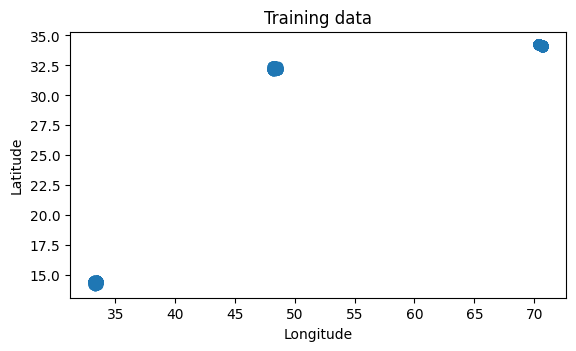

In [5]:
# Plotting the points
tr_gdf.plot()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Training data')
plt.show()

In [6]:
## Use kMeans to cluster the geodataframe into 3 regions
from sklearn.cluster import KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
tr_gdf['Cluster'] = kmeans.fit_predict(tr_gdf[['Lat', 'Lon']])

tr_gdf_0 = tr_gdf[tr_gdf["Cluster"] == 0].reset_index(drop=True)
tr_gdf_1 = tr_gdf[tr_gdf["Cluster"] == 1].reset_index(drop=True)
tr_gdf_2 = tr_gdf[tr_gdf["Cluster"] == 2].reset_index(drop=True)

/home/malasawedah/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Create a map and check the location of each cluster
center_lat, center_lon = tr_gdf_1['Lat'].mean(), tr_gdf_1['Lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add markers for each point on the map
for _, row in tr_gdf_1.iterrows():
    folium.Marker(location=[row['Lat'], row['Lon']]).add_to(m)

# Display the map
m

In [8]:
# Save the seperate region clusters based on the region name
tr_gdf_0.to_csv(f'{data_dr}/train_sudan.csv', index=False)
tr_gdf_1.to_csv(f'{data_dr}/train_iran.csv', index=False)
tr_gdf_2.to_csv(f'{data_dr}/train_afg.csv', index=False)

## Split the testing dataset into 3 regions

Repeate the same previous steps on the test dataset to have 3 seperated testing datset:
1. Sudan dataset
2. Iran dataset
3. Afghanistan dataset


In [9]:
# Preview head of test
test.head(3)

,ID,Lat,Lon
0,ID_9ZLHTVF6NSU7,34.254835,70.348699
1,ID_LNN7BFCVEZKA,32.009669,48.535526
2,ID_SOYSG7W04UH3,14.431884,33.399991


In [10]:
# Convert the test dataframe to geo dataframe
te_geom = gpd.points_from_xy(test.Lon, test.Lat)
te_gdf = gpd.GeoDataFrame(test, geometry=te_geom)

te_gdf.head(3)

,ID,Lat,Lon,geometry
0,ID_9ZLHTVF6NSU7,34.254835,70.348699,POINT (70.34870 34.25483)
1,ID_LNN7BFCVEZKA,32.009669,48.535526,POINT (48.53553 32.00967)
2,ID_SOYSG7W04UH3,14.431884,33.399991,POINT (33.39999 14.43188)


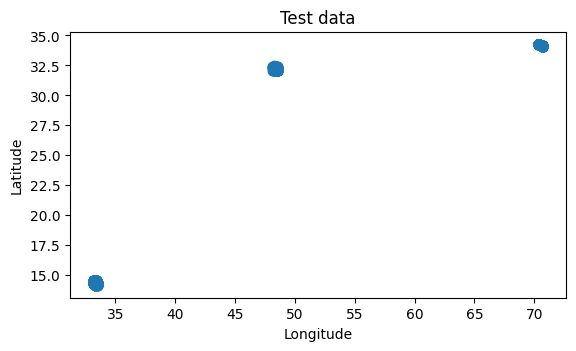

In [11]:
# Plotting the points
te_gdf.plot()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Test data')
plt.show()

In [12]:
# Use kmeans to cluster the test dataset into 3 regions
te_gdf['Cluster'] = kmeans.fit_predict(te_gdf[['Lat', 'Lon']])

te_gdf_0 = te_gdf[te_gdf["Cluster"] == 0].reset_index(drop=True)
te_gdf_1 = te_gdf[te_gdf["Cluster"] == 1].reset_index(drop=True)
te_gdf_2 = te_gdf[te_gdf["Cluster"] == 2].reset_index(drop=True)

/home/malasawedah/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Plot the test cluster points to see their location
center_lat, center_lon = te_gdf_2['Lat'].mean(), te_gdf_2['Lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# Add markers for each point on the map
for _, row in te_gdf_2.iterrows():
    folium.Marker(location=[row['Lat'], row['Lon']]).add_to(m)

m

In [14]:
# Save the seperate region clusters based on the region name
te_gdf_0.to_csv(f'{data_dr}/test_sudan.csv', index=False)
te_gdf_1.to_csv(f'{data_dr}/test_afg.csv', index=False)
te_gdf_2.to_csv(f'{data_dr}/test_iran.csv', index=False)

In [16]:
300 - 61

239

In [20]:
300-58-20-100-33

89